# LASSO Regression In-Class Exercise

In this exercise, we will see how to use LASSO for pitch detection and noise removal in audio.

We load the following packages.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
% pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load the Data

The data is taken from a sample of about 20 ms of audio from a viola.  I have already pre-processed the data.  You can load it with the following command.  The value `t` is the time (in seconds) and `y` is the sample of audio (this is a mono recording).  Noise has been artificially added to the sample.

In [38]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit05_lasso/viola_sample.p'
fn_dst = 'viola_sample.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    t,y = pickle.load(fp)

File viola_sample.p is already downloaded


Plot the data `y` vs. `t`.  

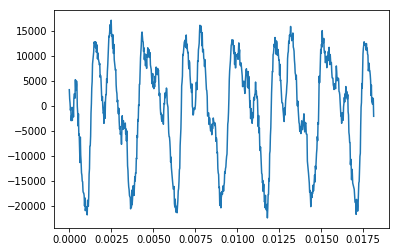

In [39]:
plt.plot(t,y)

## Creating Features for a Sinusoidal Model

We will try to fit a model of the form:

    y[i] = \sum_j a[j]*sin(2*pi*freq[j]*t[i]) + b[j]*cos(2*pi*freq[j]*t[i])

That is, `y[i]` is a sum of sinusoids.  This is a common model for audio signals since an instrument, such as a viola, produces discrete tones.  

This model is non-linear in the frequency parameters.  So, instead of trying to find the frequencies, we will fix a large number of frequencies and then require that the coefficients `a[j]` and `b[j]` are mostly sparse.  

We will use the following vector of frequencies.  This vector includes frequencies on the muscial scale as well as frequencies between the musical notes.

In [40]:
freq = 55*2**(np.arange(5*96)/96)

To fit the sinusoidal model, we will write a function to map the values `t` to 
the `sin` and `cos` features.  Finish the function `transform` that creates matrices:

    Xcos[i,j] = np.cos(2*np.pi*t[i]*freq[j])
    Xsin[i,j] = np.sin(2*np.pi*t[i]*freq[j])
    X = np.hstack((Xcos,Xsin))
    
So, if `freq` is length `d`, there will `2*d` features.  You can try to create the matrices using python broadcasting if you want to avoid a for loop.    

In [41]:
def transform(t,freq):
    # TODO
    Xcos = np.cos(2*np.pi*freq[None,:]*t[:,None])
    Xsin = np.sin(2*np.pi*freq[None,:]*t[:,None])
    X = np.hstack((Xcos,Xsin))    
    return X

Split the data `t` and `y` into training and test.  Use approximately 50% for each set.

In [42]:
t = transform(t, freq)

In [43]:
from sklearn.cross_validation import train_test_split

# TODO
ttr, tts, ytr, yts = train_test_split(t,y,test_size = 0.5)

Transform the `ttr`, `tts` into `Xtr` and `Xts`.

In [44]:
Xtr = ttr
Xts = tts

## Use LASSO to Find the Frequencies

We can now use LASSO regression to find the model
* Use LASSO regression with `alpha=500` to fit the model.  
* Find the R^2-score on the test data.
* Plot the predicted value of `y` for `t in [0,0.02]`.

In [45]:
from sklearn.linear_model import Lasso

# TODO
regr = Lasso(alpha = 500)
regr.fit(Xtr,ytr)

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
a = regr.coef_[:960/2]
b = regr.coef_[960/2:]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


<Container object of 3 artists>

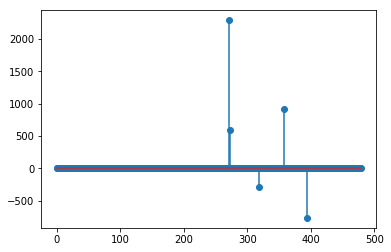

In [53]:
plt.stem(a)

<Container object of 3 artists>

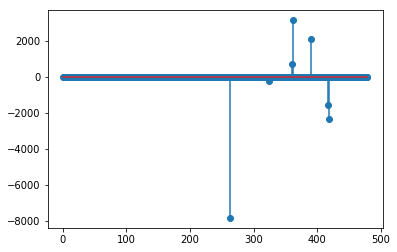

In [54]:
plt.stem(b)

Recall that you can find the coefficient in the model via `w = regr.coef_`.  If `freq` has `d` terms, then `w` will have `2*d` terms.
* Split the coefficients `w` into `a` and `b`, the terms for the `cos` and `sin` features.
* Plot `a` and `b` using `plt.stem`.
* Which frequencies is dominant in this track?


Still have time...
* Find the optimal `alpha` using cross-validation